In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows',98)

### 데이터로드

In [2]:
df=pd.read_csv("real_real_weather.csv",encoding='cp949')

### 데이터 셋 미리보기

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,location,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindGustDir,Sunshine,...,Cloud9am,Humidity9am,WindSpeed9am,Temp9am,Pressure3pm,WindDir3pm,Cloud3pm,Humidity3pm,WindSpeed3pm,Temp3pm
0,0,0,속초,2012-05-05,12.6,23.2,0.5,6.4,NW,NaN,...,0.0,66.0,1.6,18.3,998.7,SE,6.0,51.0,4.2,19.3
1,1,1,속초,2012-05-06,10.6,24.1,NaN,6.5,WSW,NaN,...,3.0,30.0,5.1,18.6,1000.8,E,2.0,35.0,2.7,20.5
2,2,2,속초,2012-05-07,14.2,25.1,NaN,7.0,NW,NaN,...,0.0,26.0,3.1,22.2,1002.8,E,0.0,31.0,2.1,22.9
3,3,3,속초,2012-05-08,12.1,21.1,NaN,6.1,NW,NaN,...,9.0,66.0,0.8,17.0,1005.5,ESE,3.0,70.0,2.8,18.3
4,4,4,속초,2012-05-09,11.9,15.4,NaN,6.5,NW,NaN,...,8.0,90.0,3.8,14.7,1013.2,NNW,9.0,89.0,4.6,13.9


### 데이터 차수 조회

In [4]:
df.shape

(343706, 25)

### 열 이름 조회

In [5]:
col_names = df.columns

col_names

Index(['Unnamed: 0', 'Unnamed: 0.1', 'location', 'Date', 'MinTemp', 'MaxTemp',
       'Rainfall', 'WindGustSpeed', 'WindGustDir', 'Sunshine', 'Evaporation',
       'TodayRain', 'TomorrowRain', 'Pressure9am', 'WindDir9am', 'Cloud9am',
       'Humidity9am', 'WindSpeed9am', 'Temp9am', 'Pressure3pm', 'WindDir3pm',
       'Cloud3pm', 'Humidity3pm', 'WindSpeed3pm', 'Temp3pm'],
      dtype='object')

### 의미없는 변수를 버린다.

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)

* 여러가지 데이터를 합치는 과정에서 발생한 변수이다.

### 데이터 셋의 요약

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343706 entries, 0 to 343705
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       343706 non-null  object 
 1   Date           343706 non-null  object 
 2   MinTemp        343672 non-null  float64
 3   MaxTemp        343679 non-null  float64
 4   Rainfall       126119 non-null  float64
 5   WindGustSpeed  343525 non-null  float64
 6   WindGustDir    343538 non-null  object 
 7   Sunshine       149465 non-null  float64
 8   Evaporation    120758 non-null  float64
 9   TodayRain      343706 non-null  int64  
 10  TomorrowRain   343706 non-null  float64
 11  Pressure9am    343424 non-null  float64
 12  WindDir9am     342981 non-null  object 
 13  Cloud9am       198047 non-null  float64
 14  Humidity9am    343372 non-null  float64
 15  WindSpeed9am   343468 non-null  float64
 16  Temp9am        343660 non-null  float64
 17  Pressure3pm    343464 non-nul

* 데이터 세트에 범주형 변수와 수치형 변수가 혼합되어 있다.
* 수치형 변수는 float64,int64 타입이다.
* 범주형 변수는 object 타입이다.
* 결측치가 존재했다.

### 데이터 세트의 통계

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,343672.0,8.509476,10.235583,-26.8,0.10,8.70,17.50,30.90
MaxTemp,343679.0,18.634834,9.650803,-15.2,10.70,20.00,26.70,41.00
Rainfall,126119.0,9.494658,19.907441,0.0,0.20,1.80,9.70,384.30
WindGustSpeed,343525.0,4.829152,2.207282,0.0,3.40,4.40,5.80,49.00
Sunshine,149465.0,13.890670,7.186080,0.0,8.37,13.17,19.33,42.86
Evaporation,120758.0,3.617181,2.096271,0.0,2.00,3.20,5.00,22.50
TodayRain,343706.0,0.204256,0.403157,0.0,0.00,0.00,0.00,1.00
TomorrowRain,343706.0,0.204247,0.403151,0.0,0.00,0.00,0.00,1.00
Pressure9am,343424.0,1004.683369,16.970395,895.7,998.60,1007.30,1015.50,1038.30
Cloud9am,198047.0,5.221856,3.958657,0.0,0.00,6.00,9.00,10.00


* 위의 명령 df.describe()는 수치 변수의 통계적 속성을 보는 데 도움이 된다.그러나 문자 변수는 제외된다.
* 문자 변수의 통계적 속성을 보려면  df.describe(include=['object']) 명령을 실행해야된다.

## 결과 변수 분석

#### 결측치를 확인

In [9]:
df['TomorrowRain'].isnull().sum()

0

* TomorrowRain 변수에는 결측치가 없다.

In [10]:
df['TomorrowRain'].nunique()

2

* TomorrowRain 변수에는 2개의 값이 있다. 

In [11]:
df['TomorrowRain'].unique()

array([0., 1.])

* (Yes : 1 , No : 0)

#### 변수의 빈도의 분포

In [12]:
df['TomorrowRain'].value_counts()

0.0    273505
1.0     70201
Name: TomorrowRain, dtype: int64

#### 비율

In [13]:
df['TomorrowRain'].value_counts()/len(df)

0.0    0.795753
1.0    0.204247
Name: TomorrowRain, dtype: float64

* 다음 날 비가 안올 비율은 79.5%
* 다음 날 비가 올 비율은 20.4%

#### 시각화

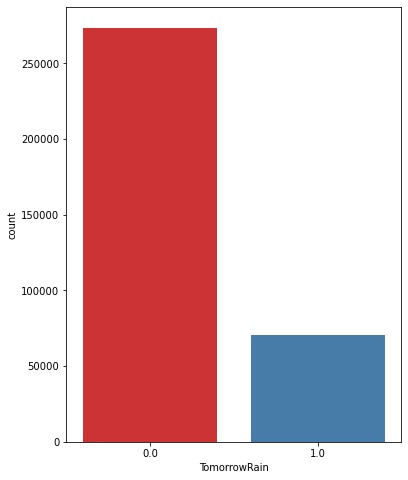

In [14]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="TomorrowRain", data=df, palette="Set1")
plt.show()

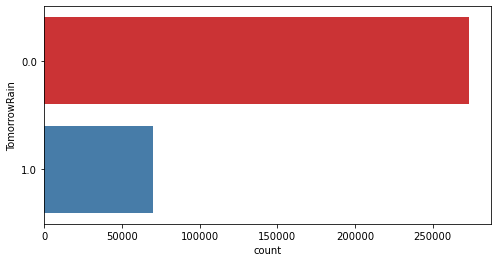

In [15]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="TomorrowRain", data=df, palette="Set1")
plt.show()

## 범주형 변수

In [16]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('{}개의 범주형 변수가 있다.\n'.format(len(categorical)))

print('범주형 변수 종류 :', categorical)

5개의 범주형 변수가 있다.

범주형 변수 종류 : ['location', 'Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [17]:
df[categorical].head()

,location,Date,WindGustDir,WindDir9am,WindDir3pm
0,속초,2012-05-05,NW,E,SE
1,속초,2012-05-06,WSW,WSW,E
2,속초,2012-05-07,NW,WNW,E
3,속초,2012-05-08,NW,SW,ESE
4,속초,2012-05-09,NW,NW,NNW


* 날짜형 변수 : Date
* 범주형 변수 : location, WindGustDir, WindDir9am, WindDir3pm

### 범주형 변수의 문제점

#### 결측치

In [18]:
df[categorical].isnull().sum()

location         0
Date             0
WindGustDir    168
WindDir9am     725
WindDir3pm     701
dtype: int64

* 3개의 범주형 변수에서 결측치가 발견되었다.

### 변주형 변수 값들의 빈도수 확인

In [19]:
for var in categorical: 
    print(df[var].value_counts())

속초         3652
울릉도        3652
창원         3652
광주         3652
안동         3652
추풍령        3652
대전         3652
청주         3652
구미         3652
부산         3652
목포         3652
여수         3652
수원         3652
원주         3652
전주         3652
흑산도        3652
강릉         3652
북강릉        3652
백령도        3652
제주         3652
보령         3652
태백         3652
울산         3652
장흥         3651
부여         3651
보은         3651
강화         3651
인제         3651
대구         3651
철원         3651
춘천         3651
동해         3651
영월         3651
서울         3651
영천         3651
의성         3651
충주         3650
인천         3650
고흥         3650
동두천        3650
양산시        3650
홍천         3650
금산         3650
상주         3650
제천         3650
성산         3650
서귀포        3650
밀양         3650
부안         3649
합천         3649
문경         3649
청송군        3649
남해         3649
대관령        3649
진주         3649
울진         3649
포항         3649
통영         3649
양평         3648
천안         3648
거창         3648
영주         3648
임실      

### 변주형 변수 값들의 빈도수 비율 확인

In [20]:
for var in categorical: 
    print(df[var].value_counts()/np.float64(len(df)))

속초         0.010625
울릉도        0.010625
창원         0.010625
광주         0.010625
안동         0.010625
추풍령        0.010625
대전         0.010625
청주         0.010625
구미         0.010625
부산         0.010625
목포         0.010625
여수         0.010625
수원         0.010625
원주         0.010625
전주         0.010625
흑산도        0.010625
강릉         0.010625
북강릉        0.010625
백령도        0.010625
제주         0.010625
보령         0.010625
태백         0.010625
울산         0.010625
장흥         0.010622
부여         0.010622
보은         0.010622
강화         0.010622
인제         0.010622
대구         0.010622
철원         0.010622
춘천         0.010622
동해         0.010622
영월         0.010622
서울         0.010622
영천         0.010622
의성         0.010622
충주         0.010620
인천         0.010620
고흥         0.010620
동두천        0.010620
양산시        0.010620
홍천         0.010620
금산         0.010620
상주         0.010620
제천         0.010620
성산         0.010620
서귀포        0.010620
밀양         0.010620
부안         0.010617
합천         0.010617


## cardinality
* 범주형 변수의 레이블 수를 cardinality라 한다.
* cardinality가 높으면 학습모델에 문제를 일으킬 수 있다.

### cardinality 확인

In [21]:
for var in categorical: 
    print(var, ' contains ', len(df[var].unique()), ' labels')

location  contains  98  labels
Date  contains  3652  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels


* Date이 아주 많은 레이블을 가지고 있다.
* Date를 년도, 월, 일로 나누어서 레이블을 줄어보자

## Date 변수를 년,월,일로 나누자

* 문자열로 코딩된 날짜를 datetime 형식으로 바꿔준다.

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343706 entries, 0 to 343705
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   location       343706 non-null  object        
 1   Date           343706 non-null  datetime64[ns]
 2   MinTemp        343672 non-null  float64       
 3   MaxTemp        343679 non-null  float64       
 4   Rainfall       126119 non-null  float64       
 5   WindGustSpeed  343525 non-null  float64       
 6   WindGustDir    343538 non-null  object        
 7   Sunshine       149465 non-null  float64       
 8   Evaporation    120758 non-null  float64       
 9   TodayRain      343706 non-null  int64         
 10  TomorrowRain   343706 non-null  float64       
 11  Pressure9am    343424 non-null  float64       
 12  WindDir9am     342981 non-null  object        
 13  Cloud9am       198047 non-null  float64       
 14  Humidity9am    343372 non-null  float64       
 15  

* Date를 년,월,일로 성공적으로 분리되었다.

In [24]:
df.drop('Date', axis=1, inplace = True)
df.head()

,location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindGustDir,Sunshine,Evaporation,TodayRain,TomorrowRain,...,Temp9am,Pressure3pm,WindDir3pm,Cloud3pm,Humidity3pm,WindSpeed3pm,Temp3pm,Year,Month,Day
0,속초,12.6,23.2,0.5,6.4,NW,NaN,NaN,0,0.0,...,18.3,998.7,SE,6.0,51.0,4.2,19.3,2012,5,5
1,속초,10.6,24.1,NaN,6.5,WSW,NaN,NaN,0,0.0,...,18.6,1000.8,E,2.0,35.0,2.7,20.5,2012,5,6
2,속초,14.2,25.1,NaN,7.0,NW,NaN,NaN,0,0.0,...,22.2,1002.8,E,0.0,31.0,2.1,22.9,2012,5,7
3,속초,12.1,21.1,NaN,6.1,NW,NaN,NaN,0,0.0,...,17.0,1005.5,ESE,3.0,70.0,2.8,18.3,2012,5,8
4,속초,11.9,15.4,NaN,6.5,NW,NaN,NaN,0,1.0,...,14.7,1013.2,NNW,9.0,89.0,4.6,13.9,2012,5,9


* Date 변수는 삭제해준다.

## location 변수 분석

In [25]:
print('Location contains', len(df.location.unique()), 'labels')

Location contains 98 labels


* 98개의 레이블을 가지고 있다.

### 레이블 확인

In [26]:
df.location.unique()

array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
       '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
       '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
       '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '진도(첨찰산)',
       '대구(기)', '홍성', '제주', '고산', '성산', '서귀포', '진주', '강화', '양평', '이천',
       '인제', '홍천', '태백', '정선군', '제천', '보은', '천안', '보령', '부여', '금산', '세종',
       '부안', '임실', '정읍', '남원', '장수', '고창군', '영광군', '김해시', '순창군', '북창원',
       '주암', '양산시', '보성군', '강진군', '장흥', '해남', '고흥', '의령군', '함양군', '광양시',
       '진도군', '봉화', '영주', '문경', '청송군', '영덕', '의성', '구미', '영천', '경주시',
       '거창', '합천', '밀양', '산청', '거제', '남해'], dtype=object)

### 빈도수 확인

In [27]:
df.location.value_counts()

속초         3652
울릉도        3652
창원         3652
광주         3652
안동         3652
추풍령        3652
대전         3652
청주         3652
구미         3652
부산         3652
목포         3652
여수         3652
수원         3652
원주         3652
전주         3652
흑산도        3652
강릉         3652
북강릉        3652
백령도        3652
제주         3652
보령         3652
태백         3652
울산         3652
장흥         3651
부여         3651
보은         3651
강화         3651
인제         3651
대구         3651
철원         3651
춘천         3651
동해         3651
영월         3651
서울         3651
영천         3651
의성         3651
충주         3650
인천         3650
고흥         3650
동두천        3650
양산시        3650
홍천         3650
금산         3650
상주         3650
제천         3650
성산         3650
서귀포        3650
밀양         3650
부안         3649
합천         3649
문경         3649
청송군        3649
남해         3649
대관령        3649
진주         3649
울진         3649
포항         3649
통영         3649
양평         3648
천안         3648
거창         3648
영주         3648
임실      

### Location 변수 One Hot Encoding

* One Hot Encoding을 하여 레이블수를 관리하자
* k-1(97) 개의 더미 변수가 생긴다.

In [28]:
pd.get_dummies(df.location, drop_first=True).head()

,강진군,강화,거제,거창,경주시,고산,고창,고창군,고흥,광양시,...,태백,통영,파주,포항,함양군,합천,해남,홍성,홍천,흑산도
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## WindGustDir 변수 분석

### 레이블 수 확인

In [29]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


### 레이블 종류 확인

In [30]:
df['WindGustDir'].unique()

array(['NW', 'WSW', 'E', 'ESE', 'SE', 'W', 'NNW', 'SSW', 'NE', 'ENE', 'N',
       'NNE', 'SSE', 'S', 'WNW', 'SW', nan], dtype=object)

### 빈도수 확인

In [31]:
df.WindGustDir.value_counts()

WNW    37316
W      35367
NW     29645
WSW    27434
SW     24471
NNW    24293
N      19798
SSW    19036
NE     18319
S      16592
NNE    16397
SE     15371
ENE    15063
SSE    14948
ESE    14934
E      14554
Name: WindGustDir, dtype: int64

### WindGustDir 변수 One Hot Encoding

* One Hot Encoding을 하여 레이블수를 관리하자
* k-1(16) 개의 더미 변수가 생긴다.

In [32]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [33]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    15063
ESE    14934
N      19798
NE     18319
NNE    16397
NNW    24293
NW     29645
S      16592
SE     15371
SSE    14948
SSW    19036
SW     24471
W      35367
WNW    37316
WSW    27434
NaN      168
dtype: int64

## WindDir9am 변수 분석

### 레이블 수 확인

In [34]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


### 레이블 종류 확인

In [35]:
df['WindDir9am'].unique()

array(['E', 'WSW', 'WNW', 'SW', 'NW', 'N', 'ENE', 'ESE', 'NNE', 'W',
       'NNW', 'SSW', 'NE', 'SE', 'SSE', 'S', nan], dtype=object)

### 레이블 빈도수 확인

In [36]:
df['WindDir9am'].value_counts()

N      72925
NE     22697
WNW    21064
NW     20284
NNE    20037
NNW    19659
ENE    19285
W      18960
E      17363
ESE    17136
WSW    17025
SSE    16326
SW     15788
SE     15539
S      15086
SSW    13807
Name: WindDir9am, dtype: int64

### WindDir9am 변수 One Hot Encoding

* One Hot Encoding을 하여 레이블수를 관리하자
* k-1(16) 개의 더미 변수가 생긴다.

In [37]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [38]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE    19285
ESE    17136
N      72925
NE     22697
NNE    20037
NNW    19659
NW     20284
S      15086
SE     15539
SSE    16326
SSW    13807
SW     15788
W      18960
WNW    21064
WSW    17025
NaN      725
dtype: int64

## WindDir3pm 변수 분석

### 레이블 수 확인

In [39]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


### 레이블 종류 확인

In [40]:
df['WindDir3pm'].unique()

array(['SE', 'E', 'ESE', 'NNW', 'NNE', 'NE', 'W', 'N', 'ENE', 'NW', 'SSE',
       'SW', 'WSW', 'SSW', 'S', 'WNW', nan], dtype=object)

### 레이블 빈도수 확인

In [41]:
df['WindDir3pm'].value_counts()

WNW    35190
W      34080
NW     30374
WSW    27509
SW     24611
N      23499
NNW    21916
SSW    18829
SSE    16774
S      16615
NE     16123
SE     15869
E      15607
NNE    15579
ESE    15442
ENE    14988
Name: WindDir3pm, dtype: int64

### WindDir3pm 변수 One Hot Encoding

* One Hot Encoding을 하여 레이블수를 관리하자
* k-1(16) 개의 더미 변수가 생긴다.

In [42]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [43]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    14988
ESE    15442
N      23499
NE     16123
NNE    15579
NNW    21916
NW     30374
S      16615
SE     15869
SSE    16774
SSW    18829
SW     24611
W      34080
WNW    35190
WSW    27509
NaN      701
dtype: int64

# 수치형 변수 분석

In [44]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('{}개의 수치형 변수가 있다.\n'.format(len(numerical)))

print('수치형 변수 종류 :', numerical)

21개의 수치형 변수가 있다.

수치형 변수 종류 : ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Sunshine', 'Evaporation', 'TodayRain', 'TomorrowRain', 'Pressure9am', 'Cloud9am', 'Humidity9am', 'WindSpeed9am', 'Temp9am', 'Pressure3pm', 'Cloud3pm', 'Humidity3pm', 'WindSpeed3pm', 'Temp3pm', 'Year', 'Month', 'Day']


## 간략하게 확인

In [45]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Sunshine,Evaporation,TodayRain,TomorrowRain,Pressure9am,Cloud9am,...,WindSpeed9am,Temp9am,Pressure3pm,Cloud3pm,Humidity3pm,WindSpeed3pm,Temp3pm,Year,Month,Day
0,12.6,23.2,0.5,6.4,NaN,NaN,0,0.0,1002.8,0.0,...,1.6,18.3,998.7,6.0,51.0,4.2,19.3,2012,5,5
1,10.6,24.1,NaN,6.5,NaN,NaN,0,0.0,1003.0,3.0,...,5.1,18.6,1000.8,2.0,35.0,2.7,20.5,2012,5,6
2,14.2,25.1,NaN,7.0,NaN,NaN,0,0.0,1002.9,0.0,...,3.1,22.2,1002.8,0.0,31.0,2.1,22.9,2012,5,7
3,12.1,21.1,NaN,6.1,NaN,NaN,0,0.0,1005.4,9.0,...,0.8,17.0,1005.5,3.0,70.0,2.8,18.3,2012,5,8
4,11.9,15.4,NaN,6.5,NaN,NaN,0,1.0,1011.6,8.0,...,3.8,14.7,1013.2,9.0,89.0,4.6,13.9,2012,5,9


## 결측치를 확인해보자

In [46]:
df[numerical].isnull().sum()

MinTemp              34
MaxTemp              27
Rainfall         217587
WindGustSpeed       181
Sunshine         194241
Evaporation      222948
TodayRain             0
TomorrowRain          0
Pressure9am         282
Cloud9am         145659
Humidity9am         334
WindSpeed9am        238
Temp9am              46
Pressure3pm         242
Cloud3pm         145707
Humidity3pm         204
WindSpeed3pm        239
Temp3pm              49
Year                  0
Month                 0
Day                   0
dtype: int64

* 16개 항목의 결측치를 가지고 있다.

## Sunshine 결측치 처리

* 결측치가 56% 정도
* 하지만 Sunshine 이 Tomorrow 데이터를 예측하는 데 많은 영향을 줄 것이라 예측, 결측치를 가지고 있는 데이터 삭제


In [47]:
Sunshine_drop_index = df[df['Sunshine'].isnull()].index

In [48]:
df=df.drop(Sunshine_drop_index)

In [49]:
df.isnull().sum()

location             0
MinTemp             11
MaxTemp              9
Rainfall         93414
WindGustSpeed       76
WindGustDir         76
Sunshine             0
Evaporation      35272
TodayRain            0
TomorrowRain         0
Pressure9am        109
WindDir9am         342
Cloud9am         43925
Humidity9am        111
WindSpeed9am       108
Temp9am             17
Pressure3pm         94
WindDir3pm         348
Cloud3pm         43937
Humidity3pm         76
WindSpeed3pm       115
Temp3pm             24
Year                 0
Month                0
Day                  0
dtype: int64

## Rainfall 결측치 처리

* Rainfall 의 결측치의 경우 강수량이 없는 것을 판단 0으로 채워 넣었다.

In [50]:
Rainfall_zero_index = df[df["Rainfall"].isnull()].index
df.loc[Rainfall_zero_index]["Rainfall"]

3652     NaN
3655     NaN
3657     NaN
3660     NaN
3661     NaN
          ..
321813   NaN
321815   NaN
321816   NaN
321817   NaN
333815   NaN
Name: Rainfall, Length: 93414, dtype: float64

In [51]:
df['Rainfall'] = df['Rainfall'].fillna(0)

In [52]:
df.isnull().sum()

location             0
MinTemp             11
MaxTemp              9
Rainfall             0
WindGustSpeed       76
WindGustDir         76
Sunshine             0
Evaporation      35272
TodayRain            0
TomorrowRain         0
Pressure9am        109
WindDir9am         342
Cloud9am         43925
Humidity9am        111
WindSpeed9am       108
Temp9am             17
Pressure3pm         94
WindDir3pm         348
Cloud3pm         43937
Humidity3pm         76
WindSpeed3pm       115
Temp3pm             24
Year                 0
Month                0
Day                  0
dtype: int64

## Cloud9am 결측치 처리

* Cloud (적운량)의 경우 10분위를 사용하여 0.0~10.0까지의 값을 가지고 있다. 따라서 이상치가 존재하지 않는 값이라서 최빈값으로 채워넣기로 하였다.


In [53]:
df["Cloud9am"].fillna(df['Cloud9am'].mode()[0], inplace=True)

In [54]:
df.isnull().sum()

location             0
MinTemp             11
MaxTemp              9
Rainfall             0
WindGustSpeed       76
WindGustDir         76
Sunshine             0
Evaporation      35272
TodayRain            0
TomorrowRain         0
Pressure9am        109
WindDir9am         342
Cloud9am             0
Humidity9am        111
WindSpeed9am       108
Temp9am             17
Pressure3pm         94
WindDir3pm         348
Cloud3pm         43937
Humidity3pm         76
WindSpeed3pm       115
Temp3pm             24
Year                 0
Month                0
Day                  0
dtype: int64

## Cloud3pm 결측치 처리

In [55]:
df['Cloud3pm'].mode()[0]

0.0

In [56]:
sum(df['Cloud3pm'] == 0.0)

23486

In [57]:
df['Cloud3pm'].value_counts()

0.0     23486
10.0    19927
8.0     10939
7.0      9143
9.0      9105
6.0      7916
3.0      5986
4.0      5078
5.0      5051
2.0      4655
1.0      4242
Name: Cloud3pm, dtype: int64

In [58]:
df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0], inplace=True)
df['Cloud3pm']

3652       7.0
3653      10.0
3654       1.0
3655       0.0
3656       3.0
          ... 
321814     8.0
321815     0.0
321816     0.0
321817     0.0
333815     0.0
Name: Cloud3pm, Length: 149465, dtype: float64

In [59]:
df.isnull().sum()

location             0
MinTemp             11
MaxTemp              9
Rainfall             0
WindGustSpeed       76
WindGustDir         76
Sunshine             0
Evaporation      35272
TodayRain            0
TomorrowRain         0
Pressure9am        109
WindDir9am         342
Cloud9am             0
Humidity9am        111
WindSpeed9am       108
Temp9am             17
Pressure3pm         94
WindDir3pm         348
Cloud3pm             0
Humidity3pm         76
WindSpeed3pm       115
Temp3pm             24
Year                 0
Month                0
Day                  0
dtype: int64

## Evaporation 결측치 처리

* 이상치가 많이 없는 것으로 판단 결측치를 평균값으로 채워 넣기로 하였다.

In [60]:
df[df["Evaporation"]>10]

,location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindGustDir,Sunshine,Evaporation,TodayRain,TomorrowRain,...,Temp9am,Pressure3pm,WindDir3pm,Cloud3pm,Humidity3pm,WindSpeed3pm,Temp3pm,Year,Month,Day
4219,북춘천,7.8,29.2,0.0,5.7,SW,24.87,11.0,0,1.0,...,18.2,1004.1,SW,4.0,9.0,4.7,29.0,2018,4,21
4595,북춘천,6.2,26.6,0.0,5.4,WSW,28.62,10.4,0,0.0,...,14.6,997.9,W,0.0,11.0,3.6,25.8,2019,5,2
4598,북춘천,9.6,28.8,0.0,6.3,WSW,24.51,11.2,0,0.0,...,15.8,1001.5,WSW,2.0,7.0,5.2,28.6,2019,5,5
4599,북춘천,7.2,19.8,0.0,6.0,NNW,29.86,10.1,0,0.0,...,13.7,1002.7,NNW,0.0,9.0,3.7,19.0,2019,5,6
4600,북춘천,2.6,23.7,0.0,6.4,WSW,28.71,10.1,0,0.0,...,11.5,1001.1,W,1.0,12.0,4.9,23.1,2019,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321452,경주시,13.1,23.7,0.7,9.3,WNW,28.27,10.3,0,0.0,...,17.6,1006.8,NW,0.0,15.0,6.4,22.4,2021,5,5
321455,경주시,5.7,25.7,0.0,8.0,SW,28.60,11.2,0,0.0,...,15.4,996.2,SW,5.0,22.0,8.0,25.0,2021,5,8
321456,경주시,10.3,24.8,0.0,9.4,W,29.58,11.1,0,0.0,...,18.0,1003.4,W,0.0,17.0,7.4,24.5,2021,5,9
321799,경주시,2.9,23.3,0.0,6.6,WNW,26.60,10.3,0,0.0,...,14.9,1011.2,NW,0.0,10.0,2.2,23.1,2022,4,17


<AxesSubplot:>

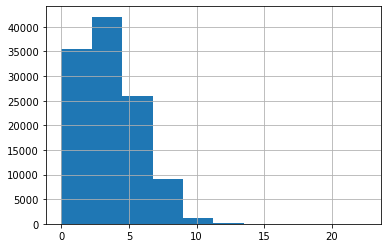

In [61]:
df["Evaporation"].hist()

In [62]:
df["Evaporation"].mean()

3.6286427364199922

In [63]:
df["Evaporation"].fillna(df["Evaporation"].mean(), inplace=True)
df["Evaporation"]

3652      2.700000
3653      1.000000
3654      4.500000
3655      5.400000
3656      3.100000
            ...   
321814    5.400000
321815    7.800000
321816    9.800000
321817    3.628643
333815    3.628643
Name: Evaporation, Length: 149465, dtype: float64

In [64]:
df.isnull().sum()

location           0
MinTemp           11
MaxTemp            9
Rainfall           0
WindGustSpeed     76
WindGustDir       76
Sunshine           0
Evaporation        0
TodayRain          0
TomorrowRain       0
Pressure9am      109
WindDir9am       342
Cloud9am           0
Humidity9am      111
WindSpeed9am     108
Temp9am           17
Pressure3pm       94
WindDir3pm       348
Cloud3pm           0
Humidity3pm       76
WindSpeed3pm     115
Temp3pm           24
Year               0
Month              0
Day                0
dtype: int64

## 나머지 결측치 처리

* 나머지 결측치는 모두 평균값으로 결측치를 채워넣기로 하였다.

In [65]:
drop_index =df[df["WindDir3pm"].isnull()].index

dfRemove = df.drop(drop_index)

drop2_index =dfRemove[dfRemove["WindDir9am"].isnull()].index

dfRemove2 = dfRemove.drop(drop2_index)
dfRemove2

,location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindGustDir,Sunshine,Evaporation,TodayRain,TomorrowRain,...,Temp9am,Pressure3pm,WindDir3pm,Cloud3pm,Humidity3pm,WindSpeed3pm,Temp3pm,Year,Month,Day
3652,북춘천,14.7,25.3,0.0,2.1,W,11.07,2.700000,0,1.0,...,18.5,1005.5,SSW,7.0,51.0,1.4,24.8,2016,10,1
3653,북춘천,15.6,19.4,31.5,4.4,WSW,3.19,1.000000,1,1.0,...,17.4,1005.1,WSW,10.0,86.0,2.4,18.3,2016,10,2
3654,북춘천,15.0,29.0,39.0,3.7,SW,16.29,4.500000,1,0.0,...,18.9,997.0,W,1.0,55.0,1.4,28.0,2016,10,3
3655,북춘천,11.4,26.3,0.0,4.5,E,19.79,5.400000,0,0.0,...,17.3,1004.7,E,0.0,49.0,4.1,25.0,2016,10,4
3656,북춘천,14.2,25.6,0.0,5.0,NNW,10.49,3.100000,0,0.0,...,17.4,996.8,ENE,3.0,53.0,2.5,23.6,2016,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321814,경주시,3.5,20.3,2.3,6.6,WNW,22.08,5.400000,1,0.0,...,14.0,1007.5,W,8.0,25.0,3.0,19.6,2022,5,2
321815,경주시,6.0,23.3,0.0,5.3,W,27.11,7.800000,0,0.0,...,10.0,1013.2,SSW,0.0,27.0,4.0,22.6,2022,5,3
321816,경주시,7.1,29.0,0.0,6.4,SSW,28.33,9.800000,0,0.0,...,18.1,1012.1,W,0.0,20.0,3.8,28.6,2022,5,4
321817,경주시,8.1,29.2,0.0,6.2,SSW,28.91,3.628643,0,0.0,...,18.8,1012.2,SSE,0.0,23.0,1.6,28.9,2022,5,5


In [66]:
dfRemove2['MinTemp'].fillna(dfRemove2['MinTemp'].mean(), inplace=True)
dfRemove2['MaxTemp'].fillna(dfRemove2['MaxTemp'].mean(), inplace=True)
dfRemove2['WindGustSpeed'].fillna(dfRemove2['WindGustSpeed'].mean(), inplace=True)
#dfRemove2['WindGustDir'].fillna(dfRemove2['WindGustDir'].mean(), inplace=True)
dfRemove2['Pressure9am'].fillna(dfRemove2['Pressure9am'].mean(), inplace=True)
dfRemove2['Humidity9am'].fillna(dfRemove2['Humidity9am'].mean(), inplace=True)
dfRemove2['Temp9am'].fillna(dfRemove2['Temp9am'].mean(), inplace=True)
dfRemove2['Pressure3pm'].fillna(dfRemove2['Pressure3pm'].mean(), inplace=True)
dfRemove2['Temp3pm'].fillna(dfRemove2['Temp3pm'].mean(), inplace=True)

In [67]:
dfRemove2.isnull().sum()

location          0
MinTemp           0
MaxTemp           0
Rainfall          0
WindGustSpeed     0
WindGustDir      13
Sunshine          0
Evaporation       0
TodayRain         0
TomorrowRain      0
Pressure9am       0
WindDir9am        0
Cloud9am          0
Humidity9am       0
WindSpeed9am      0
Temp9am           0
Pressure3pm       0
WindDir3pm        0
Cloud3pm          0
Humidity3pm      73
WindSpeed3pm      0
Temp3pm           0
Year              0
Month             0
Day               0
dtype: int64

In [68]:
dfRemove2['Humidity3pm'].fillna(dfRemove2['Humidity3pm'].mean(), inplace=True)
dfRemove2.isnull().sum()

location          0
MinTemp           0
MaxTemp           0
Rainfall          0
WindGustSpeed     0
WindGustDir      13
Sunshine          0
Evaporation       0
TodayRain         0
TomorrowRain      0
Pressure9am       0
WindDir9am        0
Cloud9am          0
Humidity9am       0
WindSpeed9am      0
Temp9am           0
Pressure3pm       0
WindDir3pm        0
Cloud3pm          0
Humidity3pm       0
WindSpeed3pm      0
Temp3pm           0
Year              0
Month             0
Day               0
dtype: int64

In [69]:
drop3_index =dfRemove2[dfRemove["WindGustDir"].isnull()].index

dfRemove3 = dfRemove2.drop(drop3_index)
dfRemove3

C:\Users\김재혁\AppData\Local\Temp/ipykernel_15840/1963943754.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drop3_index =dfRemove2[dfRemove["WindGustDir"].isnull()].index


,location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindGustDir,Sunshine,Evaporation,TodayRain,TomorrowRain,...,Temp9am,Pressure3pm,WindDir3pm,Cloud3pm,Humidity3pm,WindSpeed3pm,Temp3pm,Year,Month,Day
3652,북춘천,14.7,25.3,0.0,2.1,W,11.07,2.700000,0,1.0,...,18.5,1005.5,SSW,7.0,51.0,1.4,24.8,2016,10,1
3653,북춘천,15.6,19.4,31.5,4.4,WSW,3.19,1.000000,1,1.0,...,17.4,1005.1,WSW,10.0,86.0,2.4,18.3,2016,10,2
3654,북춘천,15.0,29.0,39.0,3.7,SW,16.29,4.500000,1,0.0,...,18.9,997.0,W,1.0,55.0,1.4,28.0,2016,10,3
3655,북춘천,11.4,26.3,0.0,4.5,E,19.79,5.400000,0,0.0,...,17.3,1004.7,E,0.0,49.0,4.1,25.0,2016,10,4
3656,북춘천,14.2,25.6,0.0,5.0,NNW,10.49,3.100000,0,0.0,...,17.4,996.8,ENE,3.0,53.0,2.5,23.6,2016,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321814,경주시,3.5,20.3,2.3,6.6,WNW,22.08,5.400000,1,0.0,...,14.0,1007.5,W,8.0,25.0,3.0,19.6,2022,5,2
321815,경주시,6.0,23.3,0.0,5.3,W,27.11,7.800000,0,0.0,...,10.0,1013.2,SSW,0.0,27.0,4.0,22.6,2022,5,3
321816,경주시,7.1,29.0,0.0,6.4,SSW,28.33,9.800000,0,0.0,...,18.1,1012.1,W,0.0,20.0,3.8,28.6,2022,5,4
321817,경주시,8.1,29.2,0.0,6.2,SSW,28.91,3.628643,0,0.0,...,18.8,1012.2,SSE,0.0,23.0,1.6,28.9,2022,5,5


In [70]:
dfRemove3.isnull().sum()

location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindGustDir      0
Sunshine         0
Evaporation      0
TodayRain        0
TomorrowRain     0
Pressure9am      0
WindDir9am       0
Cloud9am         0
Humidity9am      0
WindSpeed9am     0
Temp9am          0
Pressure3pm      0
WindDir3pm       0
Cloud3pm         0
Humidity3pm      0
WindSpeed3pm     0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

## 변수들의 이상치를 확인

In [71]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  WindGustSpeed  Sunshine  Evaporation  \
count  149454.0  149456.0  149465.0       149389.0  149465.0     149465.0   
mean        9.0      19.0       3.0            5.0      14.0          4.0   
std        10.0      10.0      13.0            2.0       7.0          2.0   
min       -27.0     -15.0       0.0            0.0       0.0          0.0   
25%         1.0      11.0       0.0            4.0       8.0          2.0   
50%         9.0      20.0       0.0            5.0      13.0          4.0   
75%        18.0      27.0       0.0            6.0      19.0          4.0   
max        31.0      41.0     361.0           49.0      43.0         22.0   

       TodayRain  TomorrowRain  Pressure9am  Cloud9am  ...  WindSpeed9am  \
count   149465.0      149465.0     149356.0  149465.0  ...      149357.0   
mean         0.0           0.0       1007.0       4.0  ...           2.0   
std          0.0           0.0         16.0       4.0  ...           2.0   
mi

* Rainfall ,WindSpeed9am ,WindSpeed3pm ,WindGustSpeed ,Evaporation  에 이상치가 있는것으로 보인다.

## 변수의 이상치를 시각화

Text(0, 0.5, 'Evaporation')

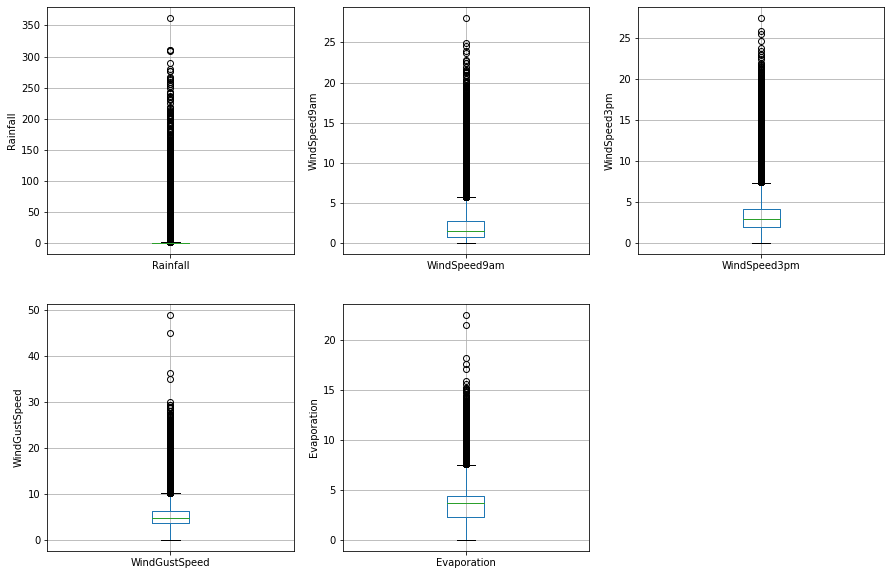

In [72]:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 3, 2)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 3, 3)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(2, 3, 4)
fig = df.boxplot(column='WindGustSpeed')
fig.set_title('')
fig.set_ylabel('WindGustSpeed')

plt.subplot(2, 3, 5)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

## 이상치 있는 변수들의 값 분포를 확인

Text(0.5, 0, 'Evaporation')

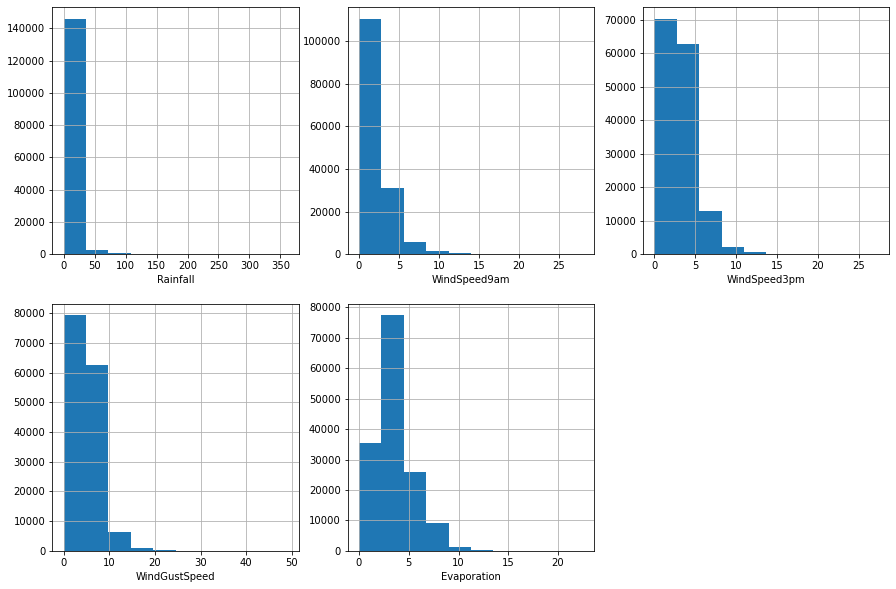

In [79]:
plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')


plt.subplot(2, 3, 2)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')


plt.subplot(2, 3, 3)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')


plt.subplot(2, 3, 4)
fig = df.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WindGustSpeed')

plt.subplot(2, 3, 5)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')

* 위의 그래프들이 모두 한쪽으로 치우쳐있는것을 확인할 수 있다.

* IQR을 사용하여 이상치를 탐색해보자

#### Rainfall의 이상치

In [89]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall 의 이상치는 < {lowerboundary} or > {upperboundary} 이다'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall 의 이상치는 < -1.2000000000000002 or > 1.6 이다


#### WindSpeed9am의 이상치

In [90]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am 의 이상치는 < {lowerboundary} or > {upperboundary} 이다'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am 의 이상치는 < -5.199999999999999 or > 8.799999999999999 이다


#### WindSpeed3pm의 이상치

In [91]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm 의 이상치는 < {lowerboundary} or > {upperboundary} 이다'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm 의 이상치는 < -4.699999999999999 or > 10.7 이다


#### WindGustSpeed의 이상치

In [92]:
IQR = df.WindGustSpeed.quantile(0.75) - df.WindGustSpeed.quantile(0.25)
Lower_fence = df.WindGustSpeed.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindGustSpeed.quantile(0.75) + (IQR * 3)
print('WindGustSpeed 의 이상치는 < {lowerboundary} or > {upperboundary} 이다'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindGustSpeed 의 이상치는 < -4.200000000000001 or > 14.0 이다


#### Evaporation의 이상치

In [88]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation 의 이상치는 < {lowerboundary} or > {upperboundary} 이다'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation 의 이상치는 < -4.000000000000002 or > 10.700000000000003 이다


# 다변수 분석

### heat map

In [93]:
correlation = df.corr()

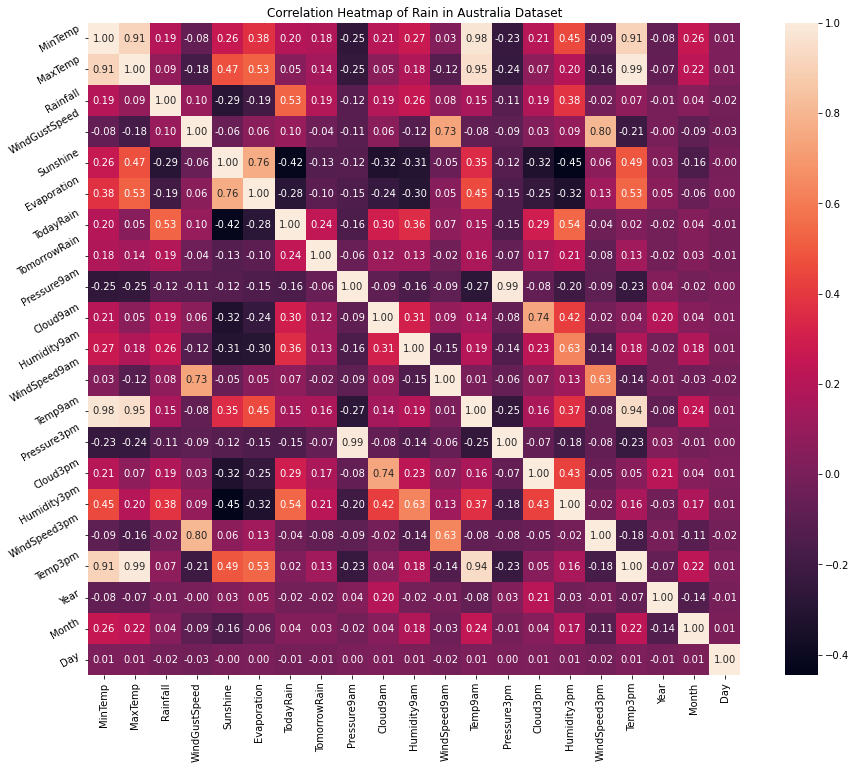

In [94]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

### 해석

* Temp관련 변수들은 높은 상관관계를 보인다.
* 오전9시 오후3시의 전운량은 높은 상관관계를 보인다.
* 오전9시 오후3시의 기압은 높은 상관관계를 보인다.
* 증발량과 일조량은 높은 상관관계를 보인다.

## Pair Plot

* Heat Map 에서 높은 상관관계를 보인 변수들만 추출해서 Pair Plot을 그려보자.

In [97]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm','Cloud9am','Cloud3pm','Sunshine','Evaporation']

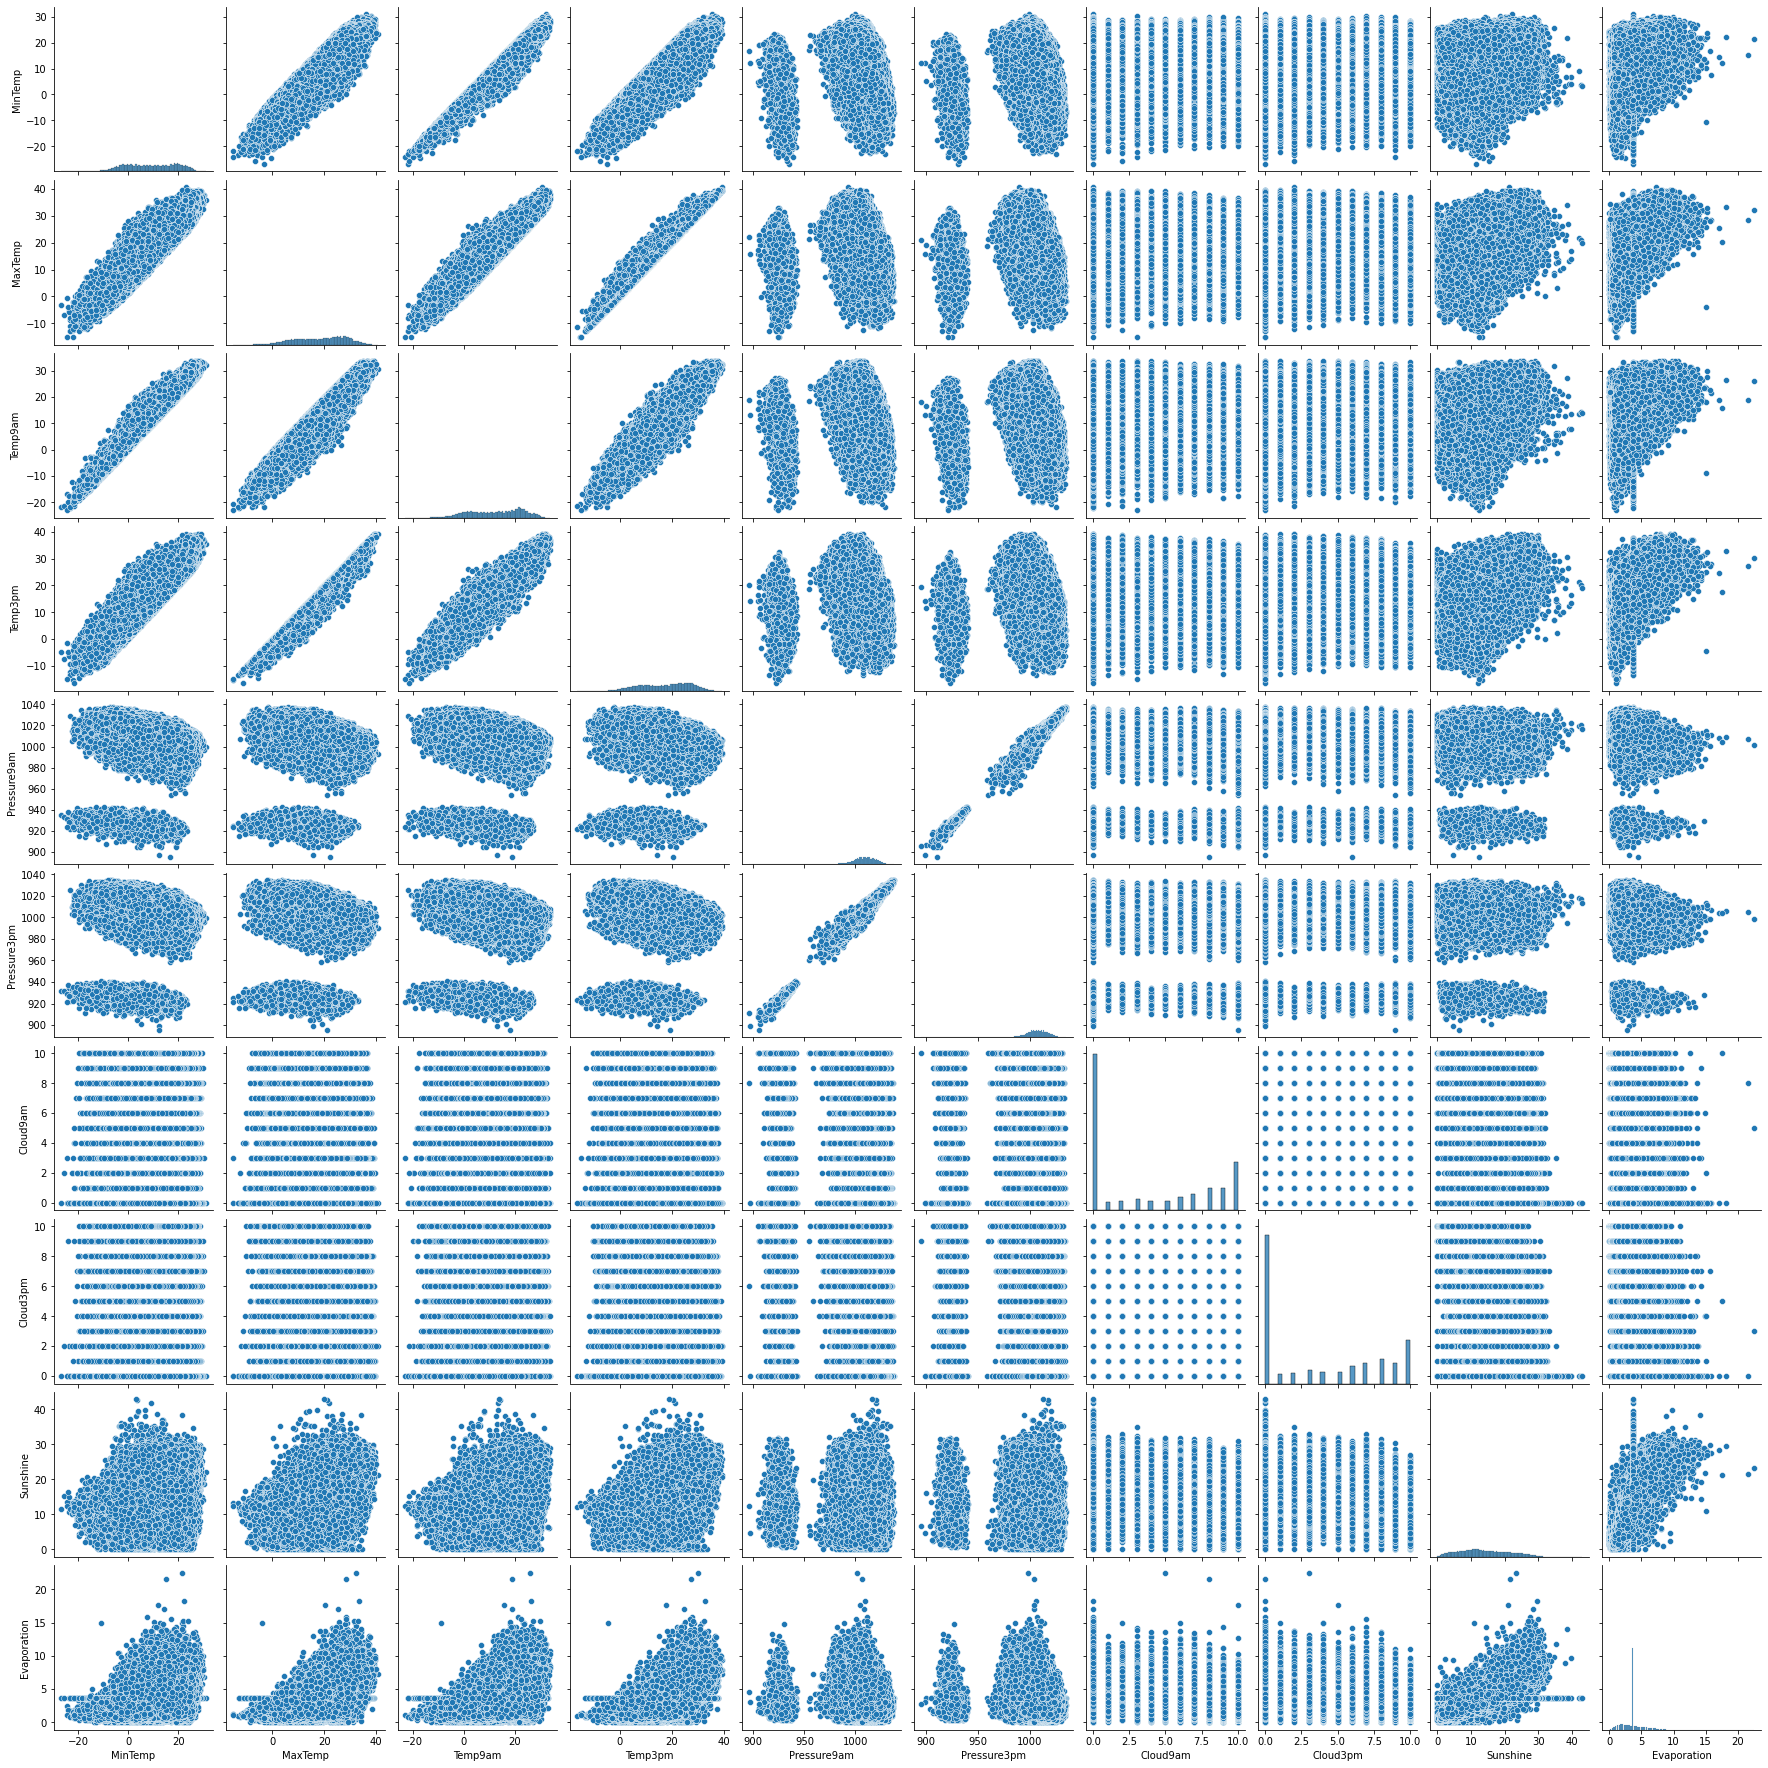

In [98]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

* Pair Plot 을 통해 변수간의 관계를 시각화하여 볼 수 있다.